In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t

# Understanding the Hypothesis Testing
## step by step process

Step - 1:  
Alternate Hypothesis (Bold claim): $ H_1 \ \Rightarrow \ >, \ <, \ \neq  $  
Null Hypothesis (Status Quo): $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $

Step - 2:  
* Collect a sample of size n
* Compute the mean from this sample $ \bar{x} $

Step - 3:
Compute Test Statistic:  
* If population variance is known $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

* If population variance is unknown $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4:
Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

Step - 5.1: Apply decision rule:
* If test statistic is z-score -
    * Two tailed z-test: $$ |z| > z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
    * Right tailed z-test: $$ z > z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed z-test: $$ z < -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    
* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

Step - 5.2: Compute p-value $ P(Test \ Statistics | H_0) $
* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

<b>Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? ~(Given that the population std is 50)~ </b>

what to do

Step - 1:  
Alternate Hypothesis (Bold claim): $$ H_1: \ u != 500  $$
Null Hypothesis (Status Quo): $$ H_0: \  u = 500  $$

Step - 2:  
* Collect a sample of size n = 10 $$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

Step - 3:   

Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $ or significance level

Step - 5.1: ? tailed t-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value


In [2]:
# taken some random sample 

sample = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]


In [3]:
#cal. sample_mean

sample_mean = sum(sample)/len(sample)

sample_mean

465.3

In [4]:
# if sample_standard deviation is given then we will do 'z' test
# if sample_standard deviation is not given then we will do 't' test

#to find sample standard deviation "np.std(----)""

In [5]:
#to find the sample_standard deviation

x = np.std(sample)

x

82.3918078451978

In [8]:
# required stuff 
sample_size = 10
sample_mean = 465.3
pop_mean = 500
sample_std = 82.4

In [9]:
# t formula

def t_score(sample_size,sample_mean,pop_mean,sample_std):
    num = sample_mean - pop_mean
    den = sample_std / sample_size**0.5
    return num/den

In [10]:
t_score(10,sample_mean,500,82.4)

-1.3316873156291593

In [11]:
tstat = t_score(sample_size,sample_mean,pop_mean,sample_std)
tstat

-1.3316873156291593

### Plotting Sampling distribution

Text(465.3, 0.0005, 'x_bar')

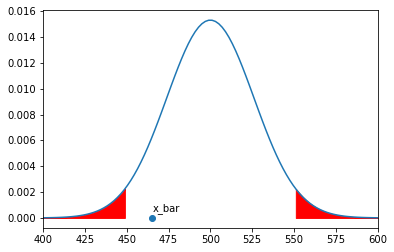

In [12]:
# Defining the sampling distribution parameters
mean = pop_mean
std = sample_std / sample_size**0.5

#Plot the graph and setting the limits
x = np.linspace(400,600,100)
y = norm.pdf(x,mean,std)
plt.xlim(400,600)
plt.plot(x,y)

#Compute the left side and right side critical values(two tailed test)
t_critical_left = pop_mean + (-1.96*std)

t_critical_right = pop_mean + 1.96*std


#Shading the left critical region
x1 = np.linspace(400, t_critical_left,100)
y1 = norm.pdf(x1,mean,std)
plt.fill_between(x1,y1,color='red')


#Shading the right critical region
x2 = np.linspace(t_critical_right,600,100)
y2 = norm.pdf(x2,mean,std)
plt.fill_between(x2,y2,color='red')


#Plot the sample mean
plt.scatter(sample_mean,0)
plt.annotate("x_bar",(sample_mean,0.0005))


# In this case sample mean falls in the acceptance region
# i.e. Fail to Reject the Null Hypothesis

In [13]:
# two tail

t_critical = t.ppf(0.95,df=9)
print(t_critical)

1.8331129326536335


In [14]:
# Concluding using the t values
t_critical = 1.83
if(abs(tstat) > t_critical):
    print("We have sufficient evidence to Reject Null Hypothesis")
else:
    print("Fail to reject null hypothesis")
    

Fail to reject null hypothesis


In [207]:
p_value = 2 * (1 - norm.cdf(abs(tstat)))
p_value


0.18296295910059968

In [35]:
alpha = 0.05
if (p_value < alpha):
    print("We have sufficient evidence to Reject Null Hypothesis")
else:
    print("Fail to reject null hypothesis")

Fail to reject null hypothesis


<b>Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? ~(Given that the population std is 0.5)~<b>

what to do

Step - 1:  
Alternate Hypothesis (Bold claim): $$ H_1: \   $$
Null Hypothesis (Status Quo): $$ H_0: \  < 4 $$

Step - 2:  
* Collect a sample of size n = 20 $$ [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

Step - 3:   

Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $ or significance level

Step - 5.1: ? tailed t-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value


In [23]:
#taken random sample

sample = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]

In [24]:
len(sample)

20

In [25]:
#to cal sample_mean

x = np.mean(sample)
x

4.25

In [26]:
#to cal sample_santard deviation

s = np.std(sample)
s

0.82915619758885

In [27]:
#required stuff

sample_size = 20
sample_mean = 4.25
pop_mean = 4
sample_std = 0.83

In [20]:
# t formula

def t_score(sample_size,sample_mean,pop_mean,sample_std):
    num = sample_mean - pop_mean
    den = sample_std / sample_size**0.5
    return num/den

In [28]:
# Calculating the z-score

t_stat = t_score(sample_size, sample_mean, pop_mean, sample_std)

t_stat

1.347028902108307

In [22]:
# question - you claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. 
# greater than 4 - so 1 tail and right sided 

In [29]:
# One Tail - Calculating the t-critical value

confidence_level = 0.95

alpha = 1 - confidence_level

t_critical = norm.ppf(1 - alpha)

print(alpha,t_critical)


0.050000000000000044 1.6448536269514722


Text(4.25, 0.1, 'x_bar')

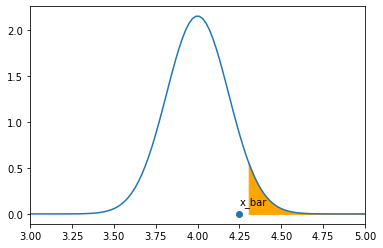

In [24]:
# Ploting the sampling distribution with rejection regions


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(3,5 , 100)
y = norm.pdf(x, mean, std)
plt.xlim(3, 5)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, 5, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls out the rejection region
# sample mean falls in acceptance region
# i.e. fail to Reject the Null Hypothesis



In [30]:
t_critical = 1.644
if (t_stat > np.abs(t_critical)):
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Fail to reject null hypothesis


In [32]:
t_stat

1.347028902108307

In [33]:
p_value

0.08898546222463755

In [31]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t_stat))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.08898546222463755
Fail to reject Null Hypothesis


<b>Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? ~(Given that the population std is 1)~<b>


Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \ ? $$
Null Hypothesis (Status Quo): $$ H_0: \ ? $$

Step - 2:  
* Collect a sample of size n = 20 $$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

Step - 3:  
Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $

Step - 5.1: ? tailed z-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

In [31]:
#taken random sample 

sample = [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]
sample_mean = sum(sample)/len(sample)
sample_mean


15.098999999999998

In [32]:
# to cal sample standard deviation becoz we are doing t test not z test

x = np.std(sample)
x

0.9994043225842081

In [33]:
t_stat = t_score(sample_size,sample_mean,pop_mean,sample_std)
t_stat

59.802695138000395

In [34]:
sample_size = 20
sample_mean = 15.1
pop_mean = 15
sample_std = 1

In [35]:
# One Tail test. Here null hypothesis is mu >= 15 and our alternate hypothesis is mu < 15
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = norm.ppf(confidence_level)
print(alpha,t_critical)

0.050000000000000044 1.6448536269514722


Text(15.1, 0.0005, 'x_bar')

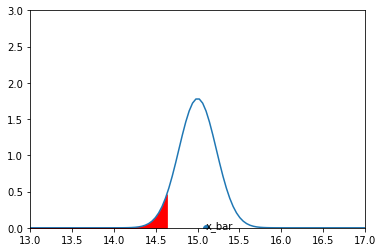

In [36]:
# Defining the sampling distribution parameters
mean = pop_mean
std = sample_std / sample_size**0.5

#Plot the graph and setting the limits
x = np.linspace(13,17,100)
y = norm.pdf(x,mean,std)
plt.xlim(13,17)
plt.ylim(0,3)
plt.plot(x,y)

#Compute the left side and right side critical values(two tailed test)
t_critical_left = pop_mean - (t_critical*std)

#Shading the left critical region
x1 = np.linspace(13, t_critical_left,100)
y1 = norm.pdf(x1,mean,std)
plt.fill_between(x1,y1,color='red')



#Plot the sample mean
plt.scatter(sample_mean,0)
plt.annotate("x_bar",(sample_mean,0.0005))

In [39]:
 t_critical_left

14.632199547709943

In [41]:
t_stat

59.802695138000395

In [42]:
t_critical

-1.64

In [40]:
t_critical = -1.64
if (t_stat > np.abs(t_critical)):
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Reject null hypothesis


In [43]:
p_value = 1.0 - norm.cdf(np.abs(t_stat))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.0
Reject Null Hypothesis


<b>Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? ~(Based on past data you know that the std is 10 ms)~<b>


Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \ ? $$
Null Hypothesis (Status Quo): $$ H_0: \ ? $$

Step - 2:  
* Collect a sample of size n = 100
* Compute sample mean $$ \bar{x} \ = \ 97.5 $$

Step - 3:
Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $

Step - 5.1: ? tailed t-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

In [ ]:
# t tail test becoz std value is not given
# one tail test. 
#

In [50]:
np.random.randint(90,110,10)

array([101,  90, 104, 107,  98, 107,  99,  98, 100, 102])

In [36]:
sample = [105, 90, 91, 102, 101, 100, 90, 108, 105, 92]

In [37]:
np.mean(sample)

98.4

In [38]:
np.std(sample)

6.62117814289874

In [39]:
sample_size = 100
sample_mean = 97.5
pop_mean = 98.4
sample_std = 6.62

In [8]:
def t_score(sample_size,sample_mean,pop_mean,sample_std):
    num = sample_mean - pop_mean
    den = sample_std / sample_size**0.5
    return num/den

In [41]:
t_stat = t_score(sample_size,sample_mean,pop_mean,sample_std)
t_stat

-1.3595166163142078

In [42]:
# One Tail test. 
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = norm.ppf(confidence_level)
print(alpha,t_critical)

0.050000000000000044 1.6448536269514722


In [43]:
t_stat

-1.3595166163142078

In [44]:
t_critical

1.6448536269514722

In [45]:
if(t_stat < -t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [46]:
p_value = 1.0 - norm.cdf(np.abs(t_stat))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.0869914703720922
Fail to reject Null Hypothesis


Text(97.5, 0, 'x_bar')

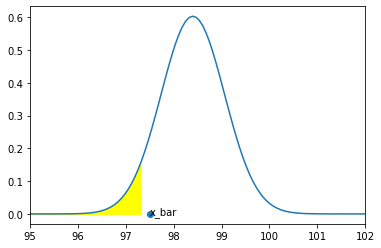

In [48]:
# Defining the sampling distribution parameters
mean = pop_mean
std = sample_std / sample_size**0.5

#Plot the graph and setting the limits
x = np.linspace(95,102,100)
y = norm.pdf(x,mean,std)
plt.xlim(95,102)
#plt.ylim(0,3)
plt.plot(x,y)

#Compute the left side and right side critical values(two tailed test)
t_critical_left = pop_mean - (t_critical*std)

#Shading the left critical region
x1 = np.linspace(95, t_critical_left,100)
y1 = norm.pdf(x1,mean,std)
plt.fill_between(x1,y1,color='yellow')

#Plot the sample mean
plt.scatter(sample_mean,0)
plt.annotate("x_bar",(sample_mean,0))

# In this case sample mean falls in the acceptance region
# i.e. Fail to reject Null Hypothesis